########################################################<br>
 Python script template for Question 2 (IAML Level 10)<br>
 Note that<br>
 - You should not change the name of this file, 'iaml01cw2_q2.py', which is the file name you should use when you submit your code for this question.<br>
 - You should write code for the functions defined below. Do not change their names.<br>
 - You can define function arguments (parameters) and returns (attributes) if necessary.<br>
 - In case you define additional functions, do not define them here, but put them in a separate Python module file, "iaml01cw2_my_helpers.py", and import it in this script.<br>
 - For those questions requiring you to show results in tables, your code does not need to present them in tables - just showing them with print() is fine.<br>
 - You do not need to include this header in your submission.<br>
########################################################

-- Code for loading modules and the data set and pre-processing ---><br>
NB: You can edit the following and add code (e.g. code for loading sklearn) if necessary.

In [1]:
import time
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from scipy import sparse
from iaml01cw2_helpers import *
from iaml01cw2_my_helpers import *

C:\Users\Petros Laptop\Anaconda3\envs\py3iaml\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence
C:\Users\Petros Laptop\Anaconda3\envs\py3iaml\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
data_path = os.path.join(os.getcwd(), 'data')
Xtrn, Ytrn, Xtst, Ytst = load_FashionMNIST(data_path)
print(Xtrn.shape)
print(Ytrn.shape)
print(Xtst.shape)
print(Ytst.shape)
Xtrn_orig = Xtrn.copy()
Xtst_orig = Xtst.copy()
Xtrn /= 255.0
Xtst /= 255.0
Xmean = np.mean(Xtrn, axis=0)
Xtrn_nm = Xtrn - Xmean
Xtst_nm = Xtst - Xmean

(60000, 784)
(60000,)
(10000, 784)
(10000,)


----

Q2.1

In [3]:
def iaml01cw2_q2_1():
    
    print(Xtrn_nm.shape)
    print(Ytrn.shape)
    logreg = LogisticRegression()
    
    X_csr = sparse.csr_matrix(Xtrn_nm)
    print(X_csr.shape)
    
    logreg.fit(X_csr,Ytrn)
    print('Logistic Regression classification accuracy on test set: {:.3f}'.format(logreg.score(Xtst_nm, Ytst)))
    print('\nThe Confusion Matrix:')
    cm = confusion_matrix(Ytst, logreg.predict(Xtst_nm))
    print(cm)
    
    return logreg

t1 = time.time()
logreg = iaml01cw2_q2_1() 
t2 = time.time()
print(f"Total time taken = {t2-t1}")

(60000, 784)
(60000,)
(60000, 784)
Logistic Regression classification accuracy on test set: 0.840

The Confusion Matrix:
[[819   3  15  50   7   4  90   1  11   0]
 [  5 953   4  27   5   0   3   1   2   0]
 [ 27   4 731  11 133   0  82   2   9   1]
 [ 31  15  14 866  33   0  37   0   4   0]
 [  0   3 115  38 760   2  72   0  10   0]
 [  2   0   0   1   0 911   0  56  10  20]
 [147   3 128  46 108   0 539   0  28   1]
 [  0   0   0   0   0  32   0 936   1  31]
 [  7   1   6  11   3   7  15   5 945   0]
 [  0   0   0   1   0  15   1  42   0 941]]
Total time taken = 336.7721245288849


In [4]:
def iaml01cw2_q2_2():
    
    X_csr = sparse.csr_matrix(Xtrn_nm)
    svc_rbf = SVC(gamma='auto')
    svc_rbf.fit(X_csr, Ytrn)
    print('RBF SVM classification accuracy on test set: {:.3f}'.format(svc_rbf.score(Xtst_nm, Ytst)))
    cm = confusion_matrix(Ytst, svc_rbf.predict(Xtst_nm))
    print(cm)
    
    return svc_rbf
    
t1 = time.time()
svc_rbf = iaml01cw2_q2_2()  
t2 = time.time()
print(f"Total time taken = {t2-t1}")

RBF SVM classification accuracy on test set: 0.846
[[845   2   8  51   4   4  72   0  14   0]
 [  4 951   7  31   5   0   1   0   1   0]
 [ 15   2 748  11 137   0  79   0   8   0]
 [ 32   6  12 881  26   0  40   0   3   0]
 [  1   0  98  36 775   0  86   0   4   0]
 [  0   0   0   1   0 914   0  57   2  26]
 [185   1 122  39  95   0 533   0  25   0]
 [  0   0   0   0   0  34   0 925   0  41]
 [  3   1   8   5   2   4  13   4 959   1]
 [  0   0   0   0   0  22   0  47   1 930]]
Total time taken = 1777.7920575141907


Q2.3

Sigma 1 = 4.450820786444203
Sigma 2 = 3.4802601145968133
PC1 shape : (784,)
PC2 shape : (784,)


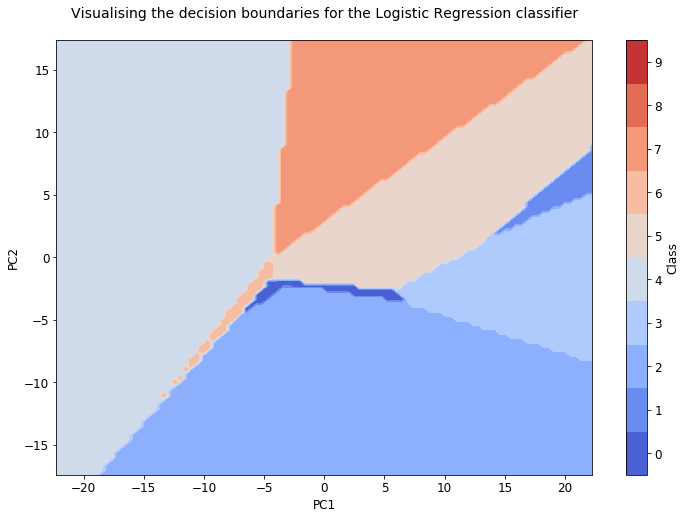

In [31]:
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

def iaml01cw2_q2_3(classifier, name):
    
    pca = PCA(n_components=2)  
    pca = pca.fit(Xtrn_nm)
    pcs = pca.components_
    pc1 = pcs[0]
    pc2 = pcs[1]
    variances = pca.explained_variance_
    sigma1 = np.sqrt(variances[0])
    sigma2 = np.sqrt(variances[1])
    print(f"Sigma 1 = {sigma1}")
    print(f"Sigma 2 = {sigma2}")
    print(f"PC1 shape : {pc1.shape}")
    print(f"PC2 shape : {pc2.shape}")
    
    span = 5
    x = np.linspace(-span*sigma1,span*sigma1,100)  
    y = np.linspace(-span*sigma2,span*sigma2,100)
    X, Y = np.meshgrid(x, y)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    xy = xy.dot(pcs)   # inverse transform, back to original 748 dimensions
    #print(xy.shape)
    
    plt.title(f'Visualising the decision boundaries for the {name} classifier\n', fontsize=14)
    
    labels = np.append(np.unique(Ytrn), 10)
    Z = classifier.predict(xy)
    Z = Z.reshape(X.shape)
    plt.contourf(X, Y, Z, cmap='coolwarm', levels = labels)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    cb = plt.colorbar(label="Class", ticks = labels)
    cb.set_ticks(labels + .5)
    cb.set_ticklabels(labels)
    plt.show()

iaml01cw2_q2_3(logreg, "Logistic Regression")  

Q2.4

Sigma 1 = 4.450820786444202
Sigma 2 = 3.480260114596812
PC1 shape : (784,)
PC2 shape : (784,)


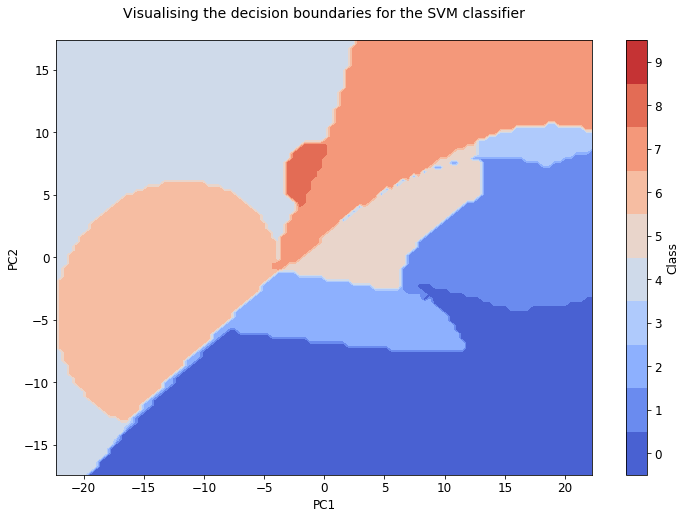

Total time taken = 318.0184528827667


In [32]:
def iaml01cw2_q2_4():
    
    #print(support_vectors.shape)
    iaml01cw2_q2_3(svc_rbf, "SVM") 
    
t1 = time.time()
iaml01cw2_q2_4() 
t2 = time.time()
print(f"Total time taken = {t2-t1}")

Q2.5

(10000, 784)
(10000,)

With C=0.01:
RBF SVM classification accuracy with 3-fold validation: 0.6481958005910101
Time taken for this C was 380.6879663467407

With C=0.03593813663804628:
RBF SVM classification accuracy with 3-fold validation: 0.6910976845108582
Time taken for this C was 270.0224199295044

With C=0.1291549665014884:
RBF SVM classification accuracy with 3-fold validation: 0.7367022711334088
Time taken for this C was 229.59889793395996

With C=0.464158883361278:
RBF SVM classification accuracy with 3-fold validation: 0.783804163444882
Time taken for this C was 156.20307302474976

With C=1.6681005372000592:
RBF SVM classification accuracy with 3-fold validation: 0.8197017376658096
Time taken for this C was 136.61134696006775

With C=5.994842503189409:
RBF SVM classification accuracy with 3-fold validation: 0.8447012881144618
Time taken for this C was 105.49323987960815

With C=21.544346900318846:
RBF SVM classification accuracy with 3-fold validation: 0.8565023106939273
Time 

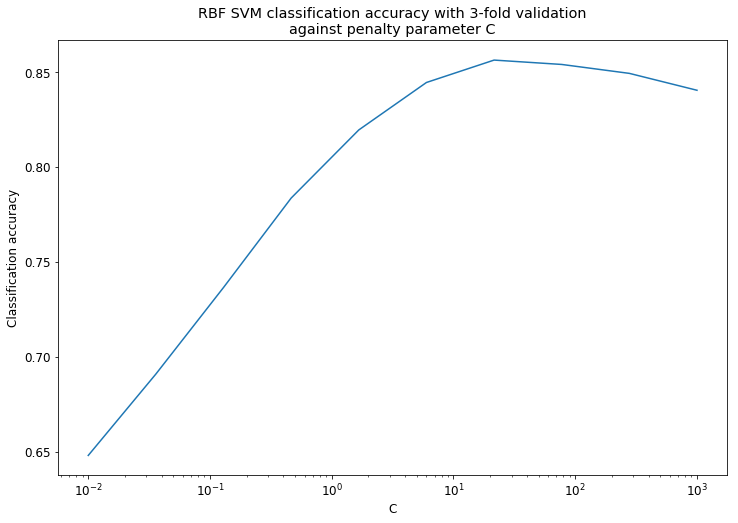

In [7]:
def iaml01cw2_q2_5():
    
    Xsmall, Ysmall = get_first_1000(Xtrn_nm, Ytrn)
    print(Xsmall.shape)
    print(Ysmall.shape)
    Cs = np.logspace(-2,3,10) 
    accuracies = []
    bestmean = 0
    bestC = 0
    
    for C in Cs:
        t1 = time.time()
        print(f"\nWith C={C}:")
        X_csr = sparse.csr_matrix(Xsmall)
        svc_rbf = SVC(C=C, gamma='auto')
        scores = cross_val_score(svc_rbf, X_csr, Ysmall, cv=3)  # 3-fold cross validation
        mean = np.mean(scores)
        print(f'RBF SVM classification accuracy with 3-fold validation: {mean}')        
        accuracies.append(mean)
        if(mean==max(accuracies)):
            bestmean = mean
            bestC = C
        t2 = time.time()
        print(f"Time taken for this C was {t2-t1}")        
            
    fig, ax = plt.subplots()
    plt.plot(Cs, accuracies)
    plt.title("RBF SVM classification accuracy with 3-fold validation\nagainst penalty parameter C")
    plt.ylabel("Classification accuracy")
    plt.xlabel("C")
    ax.set_xscale('log')
    plt.show()
    
    return bestmean, bestC
    
bestmean, bestC = iaml01cw2_q2_5()  

Q2.6 

In [33]:
def iaml01cw2_q2_6():
    
    print(bestmean)
    print(bestC)
    X_csr = sparse.csr_matrix(Xtrn_nm)
    svc_rbf = SVC(C=bestC)
    svc_rbf.fit(X_csr, Ytrn)
    print('RBF SVM classification accuracy on test set: {:.6f}'.format(svc_rbf.score(Xtst_nm, Ytst)))
    print('RBF SVM classification accuracy on train set: {:.6f}'.format(svc_rbf.score(Xtrn_nm, Ytrn)))

t1 = time.time()
iaml01cw2_q2_6()
t2 = time.time()
print(f"Total time taken = {t2-t1}")

0.8565023106939273
21.544346900318846
RBF SVM classification accuracy on test set: 0.876500
RBF SVM classification accuracy on train set: 0.908417
Total time taken = 2162.7402188777924
